<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [490]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from scipy import stats

In [491]:
plt.rcParams['figure.figsize'] = (15,8)

In [492]:
import statsmodels 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot


In [633]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [494]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [495]:
df_likes = pd.read_csv('Likes.csv')
df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [496]:
df_likes.shape

(2104, 15)

In [497]:
df_likes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

In [498]:
df_likes.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   2
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [499]:
df_likes['dob_year'].head()

0    2000
1    1999
2    1994
3    1992
4    1990
Name: dob_year, dtype: int64

In [500]:
#df_likes["dob_year"] = pd.to_datetime(df_likes["dob_year"], format='%Y')
#df_likes["dob_month"] = pd.to_datetime(df_likes["dob_month"], format = '%m')
#df_likes["dob_day"] = pd.to_datetime(df_likes["dob_day"], format = '%d')

In [501]:
#df_likes['dob_year'] = pd.to_datetime(df_likes['dob_year'].astype(str), format='%Y')
#df_likes['dob_year'] = pd.DatetimeIndex(df_likes['dob_year']).year

In [502]:
#df_likes["dob_year"] = df_likes["dob_year"].astype('object')
#df_likes["dob_month"] = df_likes["dob_year"].astype('object')
#df_likes["dob_day"] = df_likes["dob_year"].astype('object')

In [503]:
df_likes.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [504]:
df_likes['gender'].value_counts(dropna = False)

male      1400
female     702
NaN          2
Name: gender, dtype: int64

In [505]:
# analyzing the NaN value in gender column
df_likes[(df_likes['gender'] != 'male') & (df_likes['gender'] != 'female')]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
355,1781137,25,3,1988,1,NaN,203,1,1,1,0,1,0,0,0
1948,1137054,59,18,1954,2,NaN,2076,4,0,23,5,23,4,0,1


In [506]:
# viewing gender column with null values
df_likes.groupby('gender').sum().iloc[:,1:]

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,,,,
female,23549,9425,1389577,4231,203835,1444,1000,30302,8183,21794,4480,8508,3703
male,46698,18211,2771502,8143,371857,2843,2057,27859,8507,15373,4124,12486,4383


In [507]:
df_likes['gender'] = df_likes['gender'].replace(np.NaN,df_likes['gender'].mode()[0])

In [508]:
df_likes['gender'].value_counts(dropna=True)

male      1402
female     702
Name: gender, dtype: int64

In [509]:
df_likes_numeric = df_likes.select_dtypes(np.number)

In [510]:
df_likes_numeric.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0


In [511]:
df_likes_categorical = df_likes.select_dtypes(np.object_)

In [512]:
df_likes_categorical.head()

,gender
0,male
1,male
2,female
3,male
4,male


<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

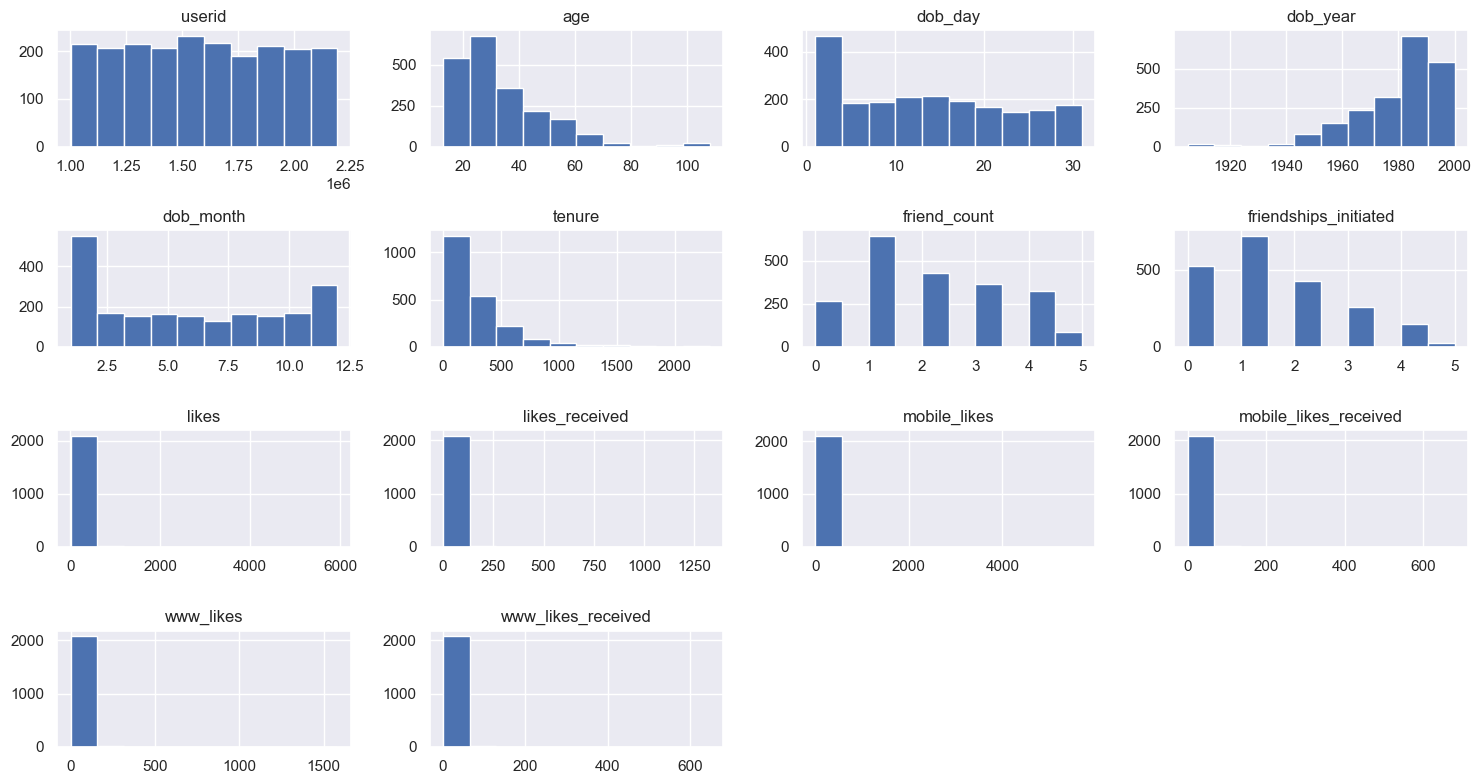

In [513]:
#1 
df_likes_numeric.hist(bins=10)
plt.tight_layout()
plt.show()

In [514]:
df_likes_numeric.skew()

userid                    0.029007
age                       1.628574
dob_day                   0.241908
dob_year                 -1.628574
dob_month                 0.160282
tenure                    2.083550
friend_count              0.339367
friendships_initiated     0.694958
likes                    24.959317
likes_received           18.418021
mobile_likes             28.564966
mobile_likes_received    18.566706
www_likes                16.941493
www_likes_received       17.059494
dtype: float64

In [515]:
# only friend_count and friendships_initiated are almost normal distributed
# age and tenure are slightly right/positively skewed 
# Rest of columns are heavily skewed right/positively skewed specially likes and mobile_likes column

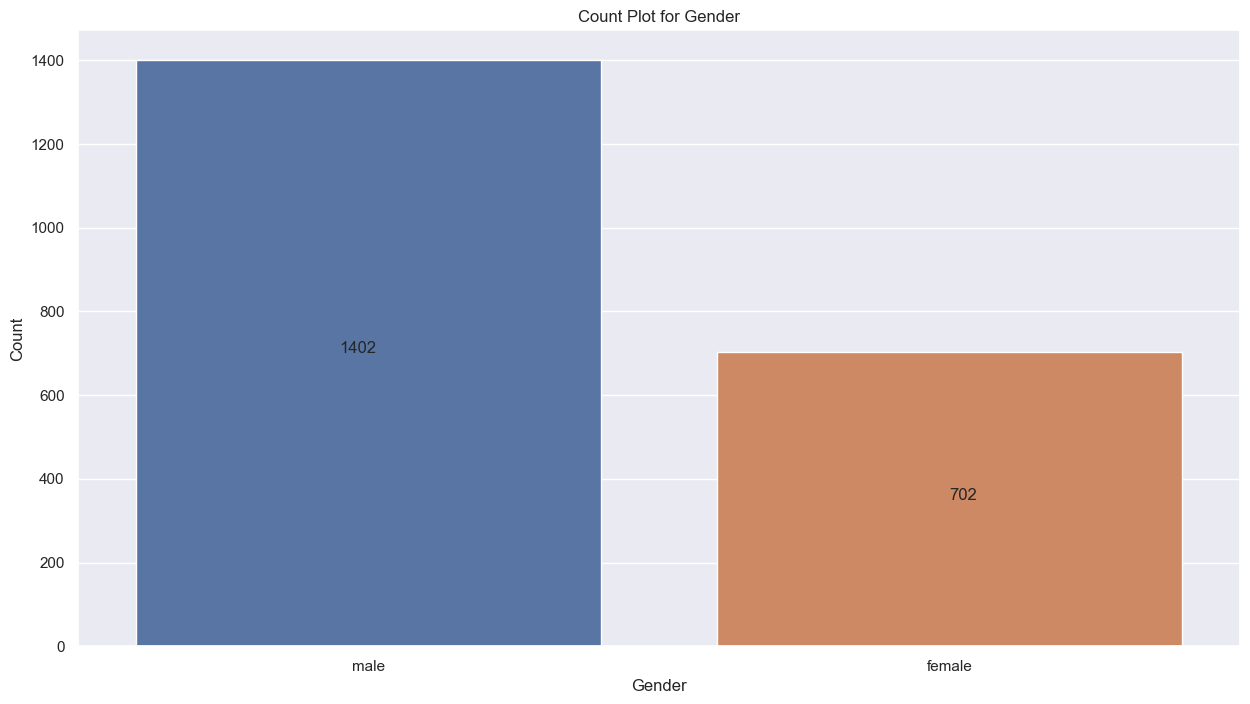

In [516]:
sns.countplot(data=df_likes_categorical,x='gender')
plt.title("Count Plot for Gender")
plt.text(x=-0.05,y=700,s=""+str(df_likes_categorical['gender'].value_counts()[0]))
plt.text(x= 1,y=350,s=""+str(df_likes_categorical['gender'].value_counts()[1]))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [517]:
# There are 1402 male users and while there are 702 female users in the dataset

In [518]:
""""plt.figure(figsize=(30,50))
sns.countplot(data=df_likes_categorical,x='dob_year')
plt.title("Count Plot for Dob_year of Person",fontsize=50)
plt.xlabel('Dob_year',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation='vertical')
plt.show()
"""""

'"plt.figure(figsize=(30,50))\nsns.countplot(data=df_likes_categorical,x=\'dob_year\')\nplt.title("Count Plot for Dob_year of Person",fontsize=50)\nplt.xlabel(\'Dob_year\',fontsize=30)\nplt.ylabel(\'Count\',fontsize=30)\nplt.xticks(rotation=\'vertical\')\nplt.show()\n'

In [519]:
# Number of people born in 1988 are higher than any other year 

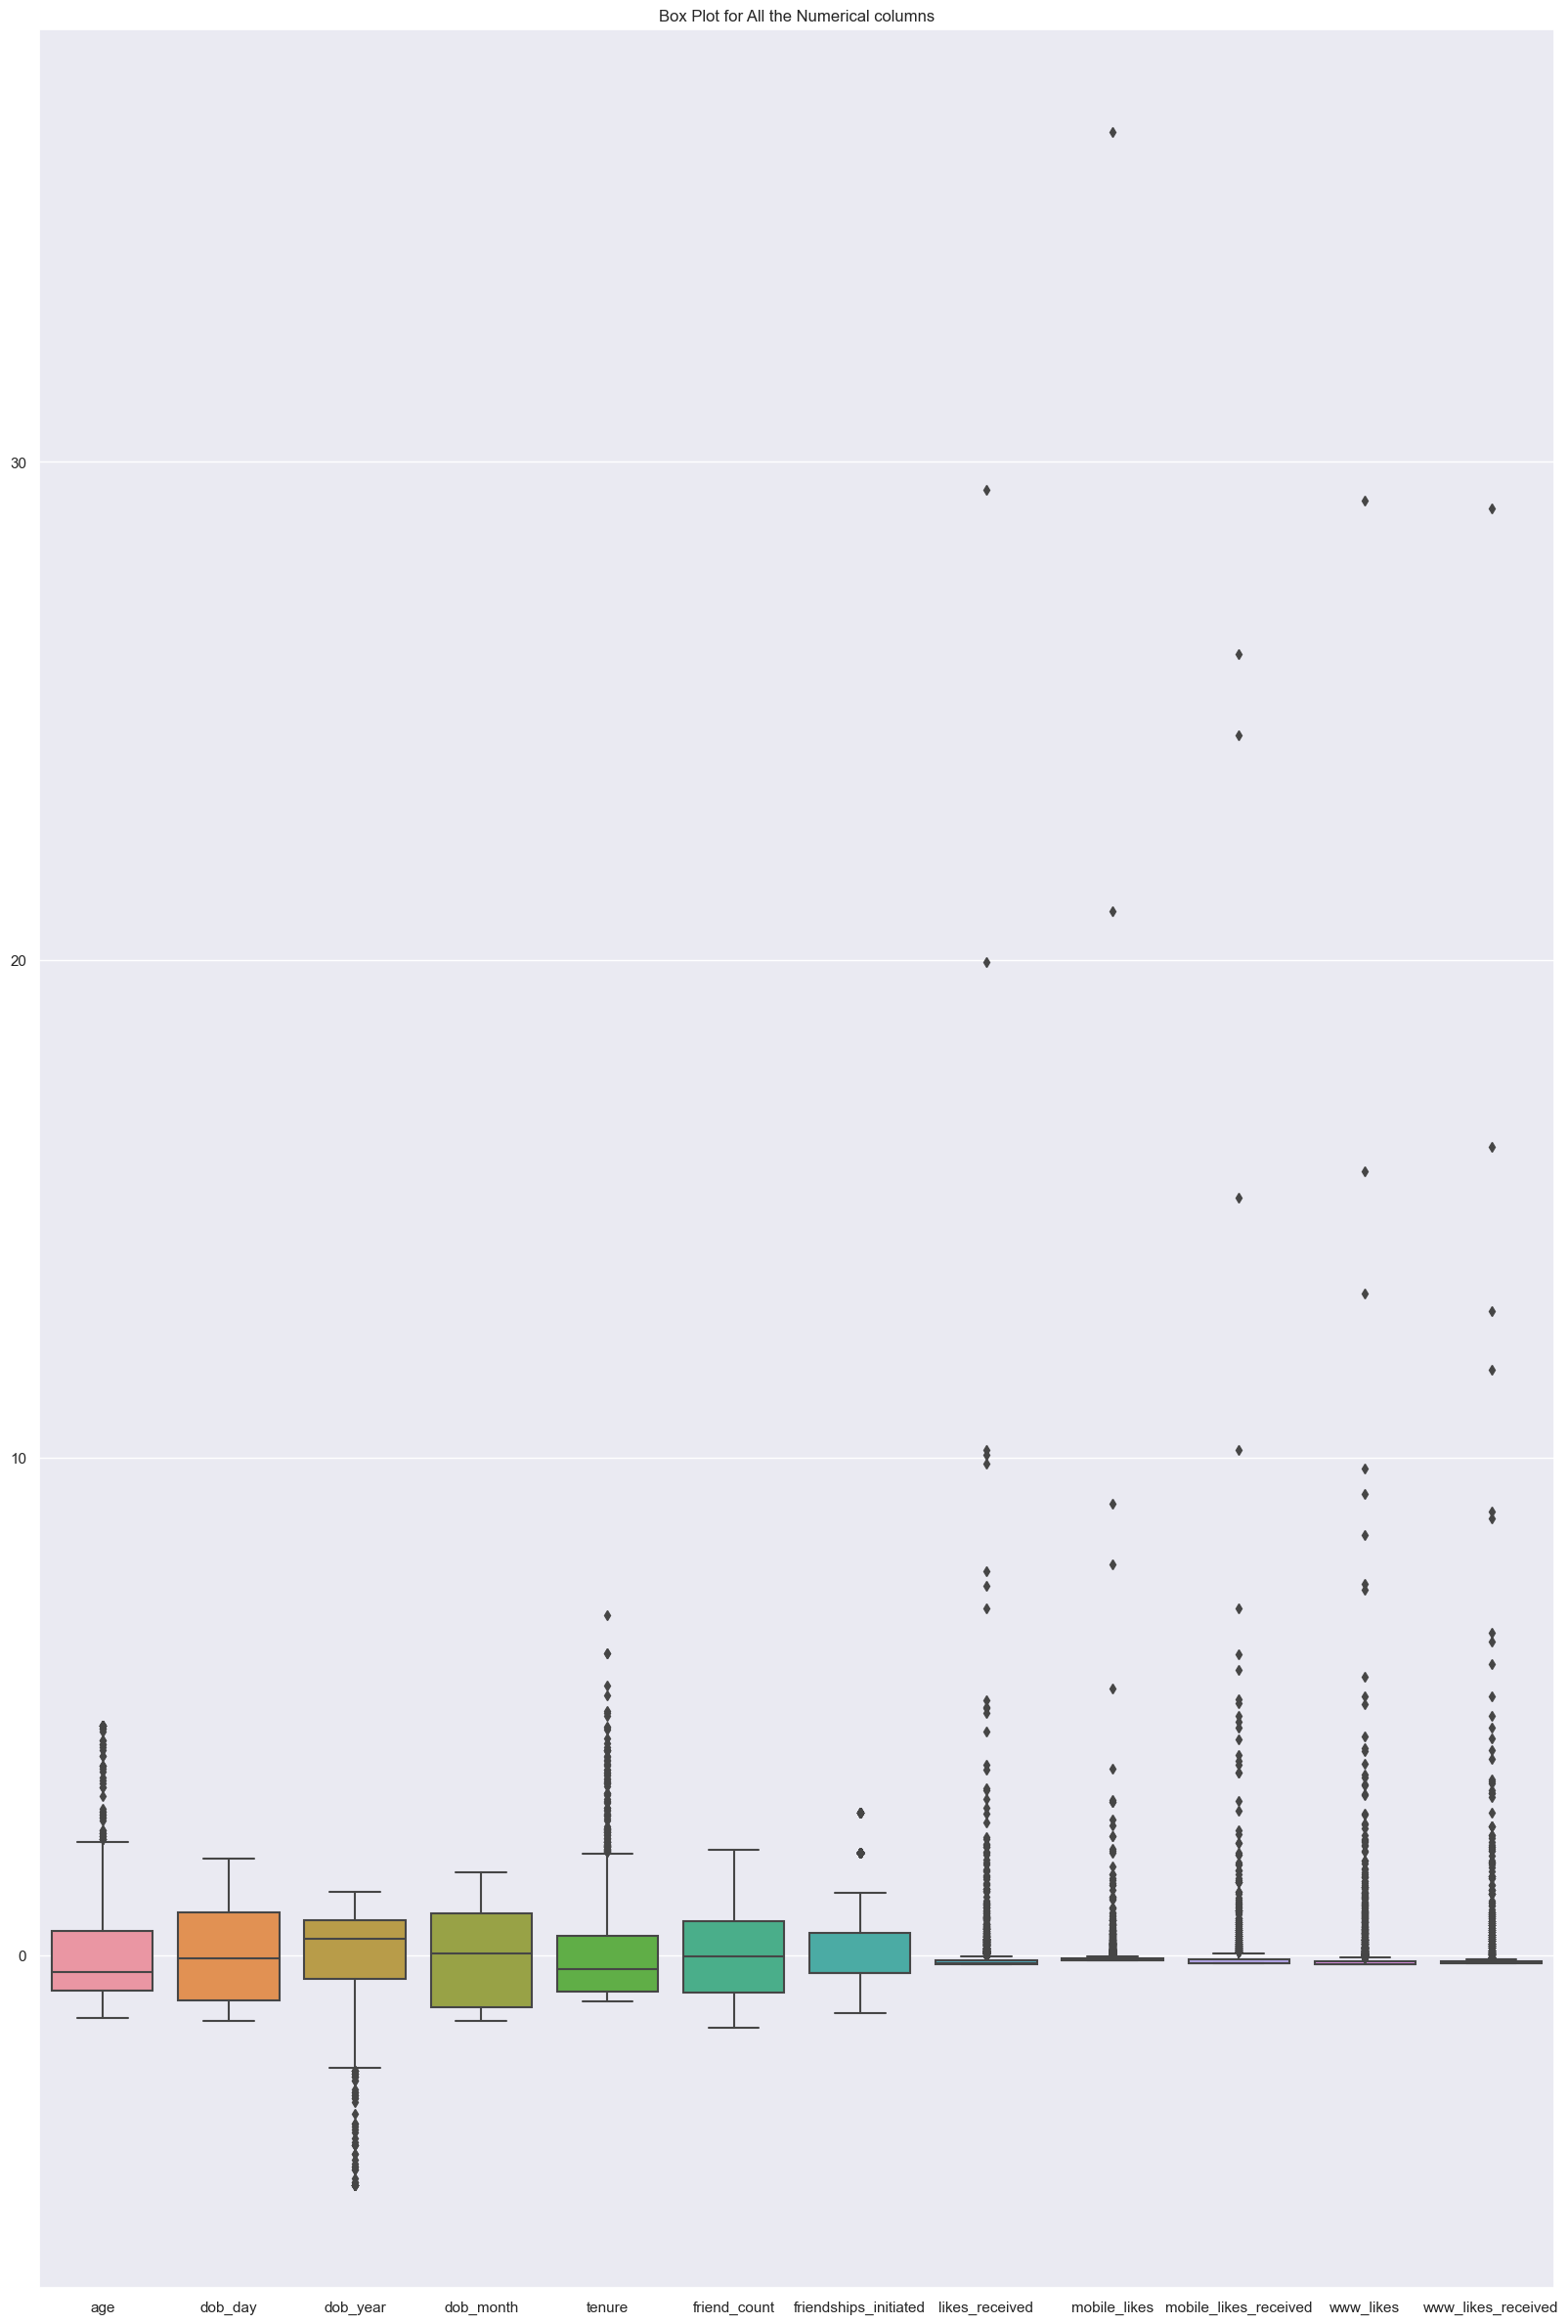

In [520]:
ss  = StandardScaler()
x_scaled = ss.fit_transform(df_likes_numeric.drop(['likes'],axis=1))
df_numeric_scaled_numeric = pd.DataFrame(x_scaled,columns=df_likes_numeric.drop(['likes'],axis=1).columns)

plt.figure(figsize=(20,30))
sns.boxplot(data=df_numeric_scaled_numeric.iloc[:,1:])
plt.title('Box Plot for All the Numerical columns')
plt.show()

In [521]:
# All the column except friend_count have potential outliers 
# For mobile_likes the highest value is going upto 37
# Most of outlier lies between the postive whisker and 5

In [522]:
df_likes_numeric.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2.104000e+03,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,1.591984e+06,33.427281,13.144962,1979.572719,5.882605,274.701046,2.039924,1.453422,27.654468,7.934886,17.676331,4.091255,9.978137,3.843631
std,3.444627e+05,16.155287,9.242513,16.155287,3.698839,297.508563,1.397070,1.242272,169.454213,44.784909,155.249561,25.828290,53.746481,22.127323
min,1.000738e+06,13.000000,1.000000,1905.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.295331e+06,22.000000,4.750000,1971.750000,2.000000,54.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.584463e+06,28.000000,12.500000,1985.000000,6.000000,191.000000,2.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.883310e+06,41.250000,21.000000,1991.000000,9.000000,387.000000,3.000000,2.000000,14.000000,3.000000,6.000000,2.000000,3.000000,1.000000
max,2.193411e+06,108.000000,31.000000,2000.000000,12.000000,2303.000000,5.000000,5.000000,5937.000000,1326.000000,5704.000000,679.000000,1580.000000,647.000000


In [523]:
df_numeric_scaled_numeric.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2104.000000,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03
mean,2.684798e-16,1.249529e-16,-7.936195e-17,-3.211626e-15,-1.165101e-16,5.741077e-17,-5.403367e-17,0.000000,1.688552e-18,-1.013131e-17,-3.377104e-18,1.181986e-17,-1.097559e-17
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00
min,-1.716836e+00,-1.264734e+00,-1.314345e+00,-4.617092e+00,-1.320351e+00,-9.235578e-01,-1.460491e+00,-1.170249,-1.772198e-01,-1.138846e-01,-1.584397e-01,-1.856960e-01,-1.737465e-01
25%,-8.614077e-01,-7.075082e-01,-9.085145e-01,-4.843355e-01,-1.049932e+00,-7.420073e-01,-7.445375e-01,-0.365081,-1.772198e-01,-1.138846e-01,-1.584397e-01,-1.856960e-01,-1.737465e-01
50%,-2.183791e-02,-3.360245e-01,-6.979869e-02,3.360245e-01,3.174600e-02,-2.814068e-01,-2.858371e-02,-0.365081,-1.548855e-01,-1.074418e-01,-1.584397e-01,-1.856960e-01,-1.737465e-01
75%,8.459441e-01,4.843355e-01,8.500832e-01,7.075082e-01,8.430041e-01,3.775543e-01,6.873701e-01,0.440087,-1.102170e-01,-7.522795e-02,-8.098685e-02,-1.298652e-01,-1.285428e-01
max,1.746402e+00,4.617092e+00,1.932297e+00,1.264734e+00,1.654262e+00,6.819236e+00,2.119278e+00,2.855590,2.943801e+01,3.663569e+01,2.613681e+01,2.921857e+01,2.907307e+01


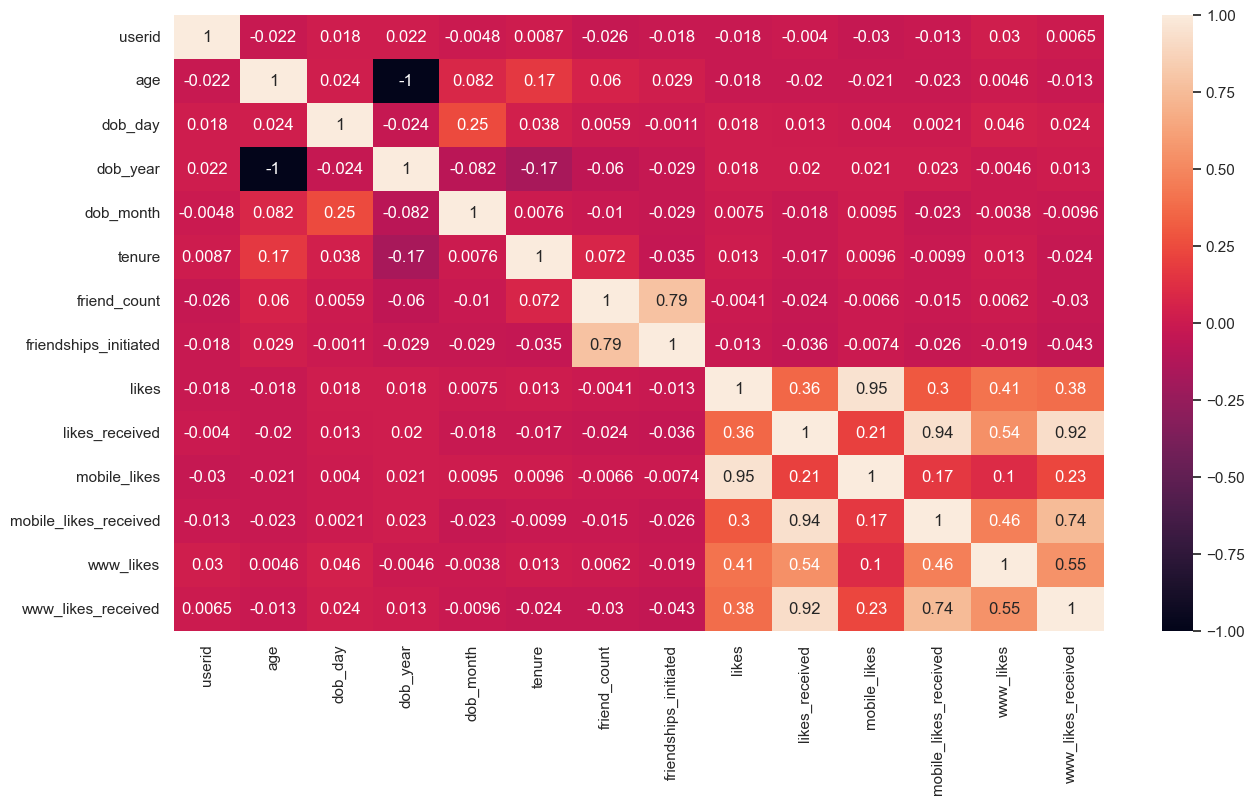

In [524]:
#2
sns.heatmap(df_likes_numeric.corr(),annot=True)
plt.show()

In [525]:
# Strong positive correlation relationship
# 1 friend_count and friend_iniated have strong positive correlation
# 2 likes_recieved mobile_likes have very strong positve correlation
# 3 likes and mobile_likes have very strong positive correlation


# Moderate positive correlation relationship
# 1 www_likes and likes_recieved have moderately positive correlation
# 2 www_likes and www_likes_recieved have moderately positive correlation
# 3 www_likes and mobile_likes_recieved have moderately positive correlation

# Low or no correlation relationship
# 1 Remaining column have very low correlation

In [526]:
# try to remove outlier

Q1 = df_likes.quantile(0.25)
Q3 = df_likes.quantile(0.75)

IQR = Q3 - Q1



df_likes_IQR = df_likes[~((df_likes > Q3+(1.5*IQR)) | (df_likes < Q1-(1.5*IQR))).any(axis=1)].reset_index(drop=True)

In [527]:
df_likes_IQR

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1392027,21,10,1992,10,male,23,5,2,1,1,1,1,0,0
1174,1309117,25,1,1988,1,male,126,5,3,1,1,1,1,0,0
1175,1266006,29,10,1984,10,female,705,5,0,1,1,1,0,0,1
1176,1756959,19,13,1994,3,male,304,5,2,1,2,1,2,0,0


<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

In [528]:
#1
df_num =  df_numeric_scaled_numeric.drop(['userid'],axis=1)
y_full = df_likes_numeric['likes']

In [529]:
y_full.skew()

24.959317269166796

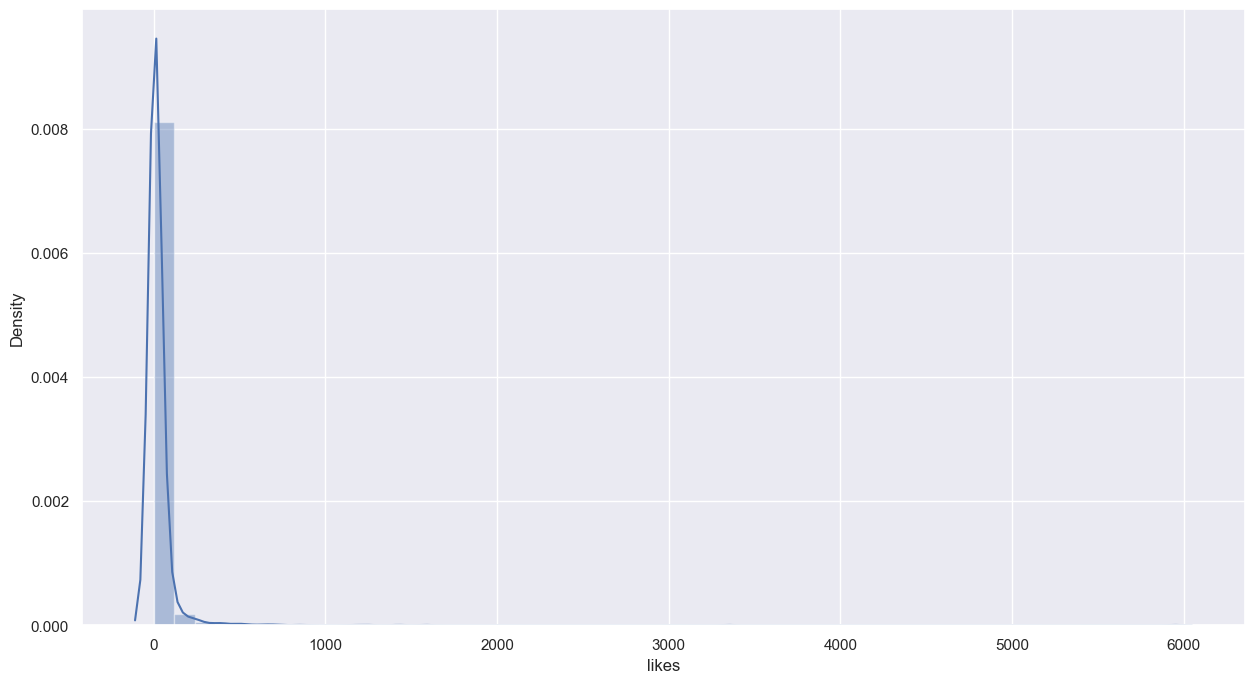

In [530]:
sns.distplot(y_full)
plt.show()

In [531]:
# We can see that dependent variable is heavily right skewed. so we will transformed the columns using sqaure root 
# transformation

In [532]:
# y_train_full = pd.Series(stats.boxcox(y_train_full)[0])
# y_test_full = pd.Series(stats.boxcox(y_test_full)[0])

In [533]:
y_full = np.sqrt(y_full)

In [534]:
y_full.skew()

6.316371923894802

In [535]:
# bulding full model

#2
df_cat = pd.get_dummies(df_likes_categorical,drop_first=True)

#3
ss = StandardScaler()
x_scaled = ss.fit_transform(df_num)
df_num = pd.DataFrame(x_scaled,columns=df_num.columns)
X_full = pd.concat([df_num,df_cat],axis=1)

#4
X_train_full,X_test_full,y_train_full,y_test_full = train_test_split(X_full,y_full,test_size=0.3,random_state=1)
print("X_train_full",X_train_full.shape)
print("X_test_full",X_test_full.shape)
print("y_train_full",y_train_full.shape)
print("y_test_full",y_test_full.shape)

X_train_full (1472, 13)
X_test_full (632, 13)
y_train_full (1472,)
y_test_full (632,)


In [536]:
df_num.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
1,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
2,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
3,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746
4,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746


<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [537]:
X_train_full

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
1427,-1.140906,-0.556795,1.140906,1.113424,0.323762,0.687370,-0.365081,-0.154886,-0.113885,-0.158440,-0.148475,-0.128543,1
641,-0.955164,0.200755,0.955164,-1.049932,-0.913472,-0.744537,-1.170249,-0.177220,-0.094556,-0.158440,-0.129865,-0.173746,0
1219,-0.274111,-0.773238,0.274111,-0.509093,-0.056150,-0.028584,0.440087,-0.177220,-0.030129,-0.158440,-0.167086,-0.173746,0
531,-0.583680,-0.989681,0.583680,-1.049932,1.305479,-0.744537,-0.365081,-0.177220,-0.107442,-0.158440,-0.148475,-0.173746,1
2040,-0.274111,-0.015688,0.274111,0.572585,1.914010,2.119278,-0.365081,-0.154886,-0.113885,-0.119713,-0.167086,-0.173746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.893250,-1.314345,0.893250,-1.320351,0.438071,-0.028584,0.440087,-0.177220,-0.107442,-0.158440,-0.185696,-0.173746,1
905,4.493264,0.200755,-4.493264,1.383843,2.542713,-0.744537,-0.365081,0.872490,7.855826,1.042080,-0.055424,0.549513,1
1096,0.097373,1.932297,-0.097373,-1.320351,-0.664680,-0.028584,0.440087,-0.177220,-0.094556,-0.158440,-0.185696,-0.173746,1
235,0.406943,-0.232131,-0.406943,-0.238673,-0.130115,-1.460491,-1.170249,-0.177220,0.047185,-0.158440,-0.185696,-0.173746,1


In [538]:
df = pd.DataFrame(y_test_full)
df.isnull().sum()

likes    0
dtype: int64

In [539]:
#1
model_full_ols = sm.OLS(y_train_full,sm.add_constant(X_train_full)).fit()
model_full_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:                -3344.8
No. Observations:                1472   AIC:                             6714.
Df Residuals:                    1460   BIC:                             6777.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.6708      0.104     35.149      0.000       3.466       3.876
age                       0.0176      0.031      0.562      0.574      -0.044       0.079
dob_day                  -0.0086      0.064     -0.134      0.893      -0.134       0.117
dob_year                 -0.0176      0.031     -0.562      0.574      -0.079       0.044
dob_month                 0.0385      0.064      0.601      0.548      -0.087       0.164
tenure                    0.0182      0.063      0.290      0.772      -0.105       0.142
friend_count              0.0365      0.102      0.358      0.720      -0.163       0.236
friendships_initiated    -0.0557      0.101     -0.549      0.583      -0.254       0.143
likes_received            0.1115      0.030      3.753      0.000       0.053       0.170
mobile_likes              2.4006      0.054     44.580      0.000       2.295       2.506
mobile_likes_received     0.1363      0.088      1.556      0.120      -0.036       0.308
www_likes                 1.7361      0.071     24.397      0.000       1.597       1.876
www_likes_received        0.0666      0.086      0.775      0.438      -0.102       0.235
gender_male              -0.5913      0.129     -4.569      0.000      -0.845      -0.337
==============================================================================
Omnibus:                      374.688   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16121.860
Skew:                           0.372   Prob(JB):                         0.00
Kurtosis:                      19.196   Cond. No.                     1.54e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [540]:
# We can see that that r2 value is 0.726 but there is high multicollinearity for above model 2.60e+16 
# We will use VIF variance influence factor to remove the column top columns which involve in  multicollinearity.

In [541]:
vif = pd.DataFrame()

vif['VIF_Factor'] = [variance_inflation_factor(X_train_full.values,i) for i in range(X_train_full.shape[1])]

vif['Feature'] = X_train_full.columns

print(vif.sort_values(by='VIF_Factor',ascending=True))

    VIF_Factor                Feature
12    1.002959            gender_male
8     1.063438           mobile_likes
4     1.068316                 tenure
1     1.090158                dob_day
3     1.093080              dob_month
10    1.717350              www_likes
6     2.761073  friendships_initiated
5     2.762283           friend_count
0          inf                    age
2          inf               dob_year
7          inf         likes_received
9          inf  mobile_likes_received
11         inf     www_likes_received


In [542]:
# We can see that age,dob_year,likes_received,likes_received,likes_received having inf VIF number so we need to drop them.

In [543]:
X_train_new =  X_train_full.drop(['www_likes_received'],axis=1)
model_vif = sm.OLS(y_train_full,sm.add_constant(X_train_new)).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:                -3344.8
No. Observations:                1472   AIC:                             6714.
Df Residuals:                    1460   BIC:                             6777.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.6708      0.104     35.149      0.000       3.466       3.876
age                       0.0176      0.031      0.562      0.574      -0.044       0.079
dob_day                  -0.0086      0.064     -0.134      0.893      -0.134       0.117
dob_year                 -0.0176      0.031     -0.562      0.574      -0.079       0.044
dob_month                 0.0385      0.064      0.601      0.548      -0.087       0.164
tenure                    0.0182      0.063      0.290      0.772      -0.105       0.142
friend_count              0.0365      0.102      0.358      0.720      -0.163       0.236
friendships_initiated    -0.0557      0.101     -0.549      0.583      -0.254       0.143
likes_received            0.2463      0.178      1.385      0.166      -0.103       0.595
mobile_likes              2.4006      0.054     44.580      0.000       2.295       2.506
mobile_likes_received     0.0586      0.179      0.328      0.743      -0.292       0.409
www_likes                 1.7361      0.071     24.397      0.000       1.597       1.876
gender_male              -0.5913      0.129     -4.569      0.000      -0.845      -0.337
==============================================================================
Omnibus:                      374.688   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16121.860
Skew:                           0.372   Prob(JB):                         0.00
Kurtosis:                      19.196   Cond. No.                     1.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [544]:
# we can see that durbin waston number is close to 2 so there is no auto correlation
# kurtosis is high is because there is some outlier are present

In [545]:
# above model have issue with multicolinearity so we will remove the columns which involve in multicolinearity using VIF 

In [546]:
X_train_vif = X_train_full.drop(['age','dob_year','likes_received','mobile_likes_received','www_likes_received'],axis=1)

In [547]:
X_train_vif

,dob_day,dob_month,tenure,friend_count,friendships_initiated,mobile_likes,www_likes,gender_male
1427,-0.556795,1.113424,0.323762,0.687370,-0.365081,-0.113885,-0.148475,1
641,0.200755,-1.049932,-0.913472,-0.744537,-1.170249,-0.094556,-0.129865,0
1219,-0.773238,-0.509093,-0.056150,-0.028584,0.440087,-0.030129,-0.167086,0
531,-0.989681,-1.049932,1.305479,-0.744537,-0.365081,-0.107442,-0.148475,1
2040,-0.015688,0.572585,1.914010,2.119278,-0.365081,-0.113885,-0.167086,1
...,...,...,...,...,...,...,...,...
960,-1.314345,-1.320351,0.438071,-0.028584,0.440087,-0.107442,-0.185696,1
905,0.200755,1.383843,2.542713,-0.744537,-0.365081,7.855826,-0.055424,1
1096,1.932297,-1.320351,-0.664680,-0.028584,0.440087,-0.094556,-0.185696,1
235,-0.232131,-0.238673,-0.130115,-1.460491,-1.170249,0.047185,-0.185696,1


In [548]:
model_vif = sm.OLS(y_train_full,sm.add_constant(X_train_vif)).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     477.0
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:                -3352.1
No. Observations:                1472   AIC:                             6722.
Df Residuals:                    1463   BIC:                             6770.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.6789      0.105     35.095      0.000       3.473       3.885
dob_day                  -0.0092      0.064     -0.143      0.886      -0.135       0.117
dob_month                 0.0362      0.064      0.565      0.572      -0.090       0.162
tenure                    0.0098      0.062      0.158      0.875      -0.112       0.132
friend_count              0.0270      0.102      0.265      0.791      -0.173       0.227
friendships_initiated    -0.0577      0.102     -0.567      0.571      -0.257       0.142
mobile_likes              2.4387      0.053     46.185      0.000       2.335       2.542
www_likes                 1.9072      0.055     34.659      0.000       1.799       2.015
gender_male              -0.6045      0.130     -4.654      0.000      -0.859      -0.350
==============================================================================
Omnibus:                      431.306   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12053.432
Skew:                           0.750   Prob(JB):                         0.00
Kurtosis:                      16.938   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [549]:
# 2
lin_reg = LinearRegression()
rfe_model = RFE(estimator=lin_reg,n_features_to_select=5)
rfe_model = rfe_model.fit(X_train_full,y_train_full)

In [550]:
feat_index = pd.Series(rfe_model.ranking_,index=X_train_full.columns)
feat_index = feat_index[feat_index==1].index

In [551]:
feat_index

Index(['likes_received', 'mobile_likes', 'mobile_likes_received', 'www_likes',
       'gender_male'],
      dtype='object')

In [552]:
# above feature are top 5 feature that affect the model.

In [553]:
X = X_full[feat_index]
X = sm.add_constant(X)
y = df_likes['likes']
y = np.sqrt(y)
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe = train_test_split(X,y,test_size=0.3,random_state=1)

model_rfe = sm.OLS(y_train_rfe,X_train_rfe).fit()
model_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     774.5
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:                -3345.4
No. Observations:                1472   AIC:                             6703.
Df Residuals:                    1466   BIC:                             6735.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.6725      0.104     35.229      0.000       3.468       3.877
likes_received            0.2486      0.177      1.403      0.161      -0.099       0.596
mobile_likes              2.4012      0.054     44.704      0.000       2.296       2.507
mobile_likes_received     0.0525      0.178      0.295      0.768      -0.297       0.402
www_likes                 1.7387      0.071     24.560      0.000       1.600       1.878
gender_male              -0.5941      0.129     -4.600      0.000      -0.847      -0.341
==============================================================================
Omnibus:                      375.552   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16279.311
Skew:                           0.372   Prob(JB):                         0.00
Kurtosis:                      19.275   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [554]:
# we can see that mobile_likes_received and likes_received look insignificant 

In [555]:
y_pred_train_rfe = model_rfe.predict(X_train_rfe)
y_pred_test_rfe = model_rfe.predict(X_test_rfe)

train_rmse = np.sqrt(mean_squared_error(y_train_rfe,y_pred_train_rfe))
test_rmse =  np.sqrt(mean_squared_error(y_test_rfe,y_pred_test_rfe))

print("train_rsme: ",train_rmse)
print("test_rsme: ",test_rmse)

train_rsme:  2.3484839731824976
test_rsme:  2.0905039463429675


In [556]:
r2_rfe = model_rfe.rsquared
r2_rfe

0.7253948786457611

In [557]:
# We can see that test rmse and train rmse value are close together so we can say that model is not the overfit but
# We can see that rsquare value around 0.725 and through this it can be possible that the model is underfit slightly.

#### Rebulding model with significant variable

In [558]:
X_signi = X.drop(['mobile_likes_received'],axis=1)
# mobile_likes_received
# likes_received
y_signi = df_likes['likes']
y_signi= np.sqrt(y_signi)
X_train_signi,X_test_signi,y_train_signi,y_test_signi = train_test_split(X_signi,y_signi,test_size=0.3,random_state=1)
model_signi = sm.OLS(y_train_signi,X_train_signi).fit()
model_signi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     968.7
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:                -3345.5
No. Observations:                1472   AIC:                             6701.
Df Residuals:                    1467   BIC:                             6727.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6726      0.104     35.241      0.000       3.468       3.877
likes_received     0.2954      0.078      3.767      0.000       0.142       0.449
mobile_likes       2.3999      0.054     44.839      0.000       2.295       2.505
www_likes          1.7383      0.071     24.567      0.000       1.599       1.877
gender_male       -0.5948      0.129     -4.608      0.000      -0.848      -0.342
==============================================================================
Omnibus:                      375.771   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16374.238
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                      19.322   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [559]:
# We have remove the multicolinearity from above model using VIF but we can see that model accurary doesn't improve much

##### Model using IQR technique

In [560]:

df_likes_num_IQR = df_likes_IQR.select_dtypes(include=np.number)
df_likes_cat_IQR = df_likes_IQR.select_dtypes(include=np.object_)
df_likes_cat_IQR = pd.get_dummies(df_likes_cat_IQR,drop_first=True)

#3
ss = StandardScaler()
X_IQR = df_likes_num_IQR.drop(['likes','userid'],axis=1)
x_scaled = ss.fit_transform(X_IQR)
df_num = pd.DataFrame(x_scaled,columns=X_IQR.columns)


In [561]:
X_full_IQR = pd.concat([df_num,df_likes_cat_IQR],axis=1)
X_full_IQR.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,-1.439427,-1.183467,1.439427,-1.075337,-1.124978,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1
1,-1.360604,0.967295,1.360604,-1.346067,-0.625506,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1
2,-0.966488,0.537143,0.966488,1.090505,-0.106824,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,0
3,-0.808841,-1.291005,0.808841,-1.346067,0.450280,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1
4,-0.651195,-0.323162,0.651195,-1.075337,1.660539,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1


In [562]:
y_IQR = df_likes_IQR['likes']
y_IQR = np.sqrt(y_IQR)
X_full_IQR.head()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_male
0,-1.439427,-1.183467,1.439427,-1.075337,-1.124978,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1
1,-1.360604,0.967295,1.360604,-1.346067,-0.625506,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1
2,-0.966488,0.537143,0.966488,1.090505,-0.106824,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,0
3,-0.808841,-1.291005,0.808841,-1.346067,0.450280,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1
4,-0.651195,-0.323162,0.651195,-1.075337,1.660539,-1.383048,-1.214132,-0.617178,-0.760728,-0.506809,0.134784,-0.404076,1


In [563]:
X_full_IQR.shape

(1178, 13)

In [564]:

X_train_full_IQR,X_test_full_IQR,y_train_full_IQR,y_test_full_IQR = train_test_split(X_full_IQR,y_IQR,test_size=0.3,random_state=1)
print("X_train_full",X_train_full_IQR.shape)
print("X_test_full",X_test_full_IQR.shape)
print("y_train_full",y_train_full_IQR.shape)
print("y_test_full",y_test_full_IQR.shape)

X_train_full (824, 13)
X_test_full (354, 13)
y_train_full (824,)
y_test_full (354,)


In [565]:
model_IQR = sm.OLS(y_train_full_IQR,sm.add_constant(X_train_full_IQR)).fit()
model_IQR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:11   Log-Likelihood:                 439.46
No. Observations:                 824   AIC:                            -854.9
Df Residuals:                     812   BIC:                            -798.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.6429      0.009    185.076      0.000       1.625       1.660
age                      -0.0004      0.003     -0.174      0.862      -0.005       0.004
dob_day                   0.0035      0.005      0.679      0.498      -0.007       0.013
dob_year                  0.0004      0.003      0.174      0.862      -0.004       0.005
dob_month                 0.0059      0.005      1.144      0.253      -0.004       0.016
tenure                   -0.0011      0.005     -0.221      0.825      -0.011       0.009
friend_count             -0.0276      0.007     -3.694      0.000      -0.042      -0.013
friendships_initiated     0.0241      0.007      3.224      0.001       0.009       0.039
likes_received            0.0127      0.003      4.967      0.000       0.008       0.018
mobile_likes              0.7069      0.005    129.188      0.000       0.696       0.718
mobile_likes_received     0.0155      0.003      4.530      0.000       0.009       0.022
www_likes                 0.3620      0.005     66.470      0.000       0.351       0.373
www_likes_received       -0.0019      0.005     -0.376      0.707      -0.012       0.008
gender_male              -0.0205      0.011     -1.896      0.058      -0.042       0.001
==============================================================================
Omnibus:                       82.499   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.358
Skew:                          -0.632   Prob(JB):                     1.12e-34
Kurtosis:                       4.719   Cond. No.                     4.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [566]:
vif_IQR = pd.DataFrame()

vif_IQR['VIF_Factor'] = [variance_inflation_factor(X_full_IQR.values,i) for i in range(X_full_IQR.shape[1])]

vif_IQR['Feature'] = X_train_full_IQR.columns

print(vif_IQR.sort_values(by='VIF_Factor',ascending=True))

      VIF_Factor                Feature
1   1.070670e+00                dob_day
4   1.077784e+00                 tenure
3   1.086347e+00              dob_month
8   1.110290e+00           mobile_likes
10  1.149758e+00              www_likes
6   2.140197e+00  friendships_initiated
5   2.177040e+00           friend_count
12  3.021718e+00            gender_male
7   2.139951e+04         likes_received
11  3.423922e+05     www_likes_received
9   1.048576e+06  mobile_likes_received
0            inf                    age
2            inf               dob_year


In [567]:
X_vif_IQR = X_full_IQR.drop(['likes_received','mobile_likes_received','www_likes_received','dob_year'],axis=1)

In [568]:
X_vif_IQR.head()

,age,dob_day,dob_month,tenure,friend_count,friendships_initiated,mobile_likes,www_likes,gender_male
0,-1.439427,-1.183467,-1.075337,-1.124978,-1.383048,-1.214132,-0.760728,0.134784,1
1,-1.360604,0.967295,-1.346067,-0.625506,-1.383048,-1.214132,-0.760728,0.134784,1
2,-0.966488,0.537143,1.090505,-0.106824,-1.383048,-1.214132,-0.760728,0.134784,0
3,-0.808841,-1.291005,-1.346067,0.450280,-1.383048,-1.214132,-0.760728,0.134784,1
4,-0.651195,-0.323162,-1.075337,1.660539,-1.383048,-1.214132,-0.760728,0.134784,1


In [569]:
X_train_vif_IQR,X_test_vif_IQR,y_train_vif_IQR,y_test_vif_IQR = train_test_split(X_vif_IQR,y_IQR,test_size=0.3,random_state=1)
print("X_train_full",X_train_full_IQR.shape)
print("X_test_full",X_test_full_IQR.shape)
print("y_train_full",y_train_full_IQR.shape)
print("y_test_full",y_test_full_IQR.shape)

X_train_full (824, 13)
X_test_full (354, 13)
y_train_full (824,)
y_test_full (354,)


In [570]:
model_IQR_vif = sm.OLS(y_train_full_IQR,sm.add_constant(X_train_vif_IQR)).fit()
model_IQR_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     2110.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:12   Log-Likelihood:                 425.94
No. Observations:                 824   AIC:                            -831.9
Df Residuals:                     814   BIC:                            -784.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.6433      0.009    182.499      0.000       1.626       1.661
age                      -0.0011      0.005     -0.224      0.823      -0.011       0.009
dob_day                   0.0050      0.005      0.965      0.335      -0.005       0.015
dob_month                 0.0055      0.005      1.060      0.289      -0.005       0.016
tenure                   -0.0033      0.005     -0.638      0.523      -0.013       0.007
friend_count             -0.0278      0.008     -3.667      0.000      -0.043      -0.013
friendships_initiated     0.0236      0.008      3.115      0.002       0.009       0.039
mobile_likes              0.7121      0.005    130.632      0.000       0.701       0.723
www_likes                 0.3632      0.005     68.542      0.000       0.353       0.374
gender_male              -0.0217      0.011     -1.980      0.048      -0.043      -0.000
==============================================================================
Omnibus:                       99.193   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.534
Skew:                          -0.719   Prob(JB):                     4.70e-44
Kurtosis:                       4.934   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [571]:
# We can see that there is no multicolinearity in the model and accurracy of model is around 0.959.
# we need to remove insignificant variable from model

In [572]:
# 2
lin_reg = LinearRegression()
rfe_model_IQR = RFE(estimator=lin_reg,n_features_to_select=5)
rfe_model_IQR = rfe_model.fit(X_train_vif_IQR,y_train_full_IQR)

In [573]:
feat_index = pd.Series(rfe_model_IQR.ranking_,index=X_train_vif_IQR.columns)
feat_index = feat_index[feat_index==1].index

In [574]:
feat_index

Index(['friend_count', 'friendships_initiated', 'mobile_likes', 'www_likes',
       'gender_male'],
      dtype='object')

In [575]:
X = X_vif_IQR[feat_index]
X = sm.add_constant(X)
y = df_likes_IQR['likes']
y = np.sqrt(y)
X_train_rfe_IQR,X_test_rfe_IQR,y_train_rfe_IQR,y_test_rfe_IQR = train_test_split(X,y,test_size=0.3,random_state=1)

print("X_train_rfe_IQR_signi",X_train_rfe_IQR.shape)
print("X_test_rfe_IQR_signi",X_test_rfe_IQR.shape)
print("y_train_rfe_IQR_signi",y_train_rfe_IQR.shape)
print("y_test_IQR_rfe_signi",y_test_rfe_IQR.shape)


X_train_rfe_IQR_signi (824, 6)
X_test_rfe_IQR_signi (354, 6)
y_train_rfe_IQR_signi (824,)
y_test_IQR_rfe_signi (354,)


In [576]:
model_rfe_IQR = sm.OLS(y_train_rfe_IQR,X_train_rfe_IQR).fit()
model_rfe_IQR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3802.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:12   Log-Likelihood:                 424.43
No. Observations:                 824   AIC:                            -836.9
Df Residuals:                     818   BIC:                            -808.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.6431      0.009    183.636      0.000       1.625       1.661
friend_count             -0.0285      0.007     -3.811      0.000      -0.043      -0.014
friendships_initiated     0.0234      0.008      3.105      0.002       0.009       0.038
mobile_likes              0.7124      0.005    131.151      0.000       0.702       0.723
www_likes                 0.3634      0.005     68.839      0.000       0.353       0.374
gender_male              -0.0211      0.011     -1.941      0.053      -0.042       0.000
==============================================================================
Omnibus:                       99.471   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.532
Skew:                          -0.724   Prob(JB):                     7.75e-44
Kurtosis:                       4.920   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [577]:
# We can getting 0.959 as r2 value in above model but we can see that gender_male is insignificant value so we will remove that as well and check

In [578]:
X = X_vif_IQR[feat_index].drop(['gender_male'],axis=1)
X = sm.add_constant(X)
y = df_likes_IQR['likes']
y = np.sqrt(y)
X_train_rfe_IQR_signi,X_test_rfe_IQR_signi,y_train_rfe_IQR_signi,y_test_IQR_rfe_signi = train_test_split(X,y,test_size=0.3,random_state=1)

print("X_train_rfe_IQR_signi",X_train_rfe_IQR_signi.shape)
print("X_test_rfe_IQR_signi",X_test_rfe_IQR_signi.shape)
print("y_train_rfe_IQR_signi",y_train_rfe_IQR_signi.shape)
print("y_test_IQR_rfe_signi",y_test_IQR_rfe_signi.shape)


X_train_rfe_IQR_signi (824, 5)
X_test_rfe_IQR_signi (354, 5)
y_train_rfe_IQR_signi (824,)
y_test_IQR_rfe_signi (354,)


In [579]:
model_rfe_IQR_signi = sm.OLS(y_train_rfe_IQR,X_train_rfe_IQR).fit()
model_rfe_IQR_signi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     3802.
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:09:12   Log-Likelihood:                 424.43
No. Observations:                 824   AIC:                            -836.9
Df Residuals:                     818   BIC:                            -808.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.6431      0.009    183.636      0.000       1.625       1.661
friend_count             -0.0285      0.007     -3.811      0.000      -0.043      -0.014
friendships_initiated     0.0234      0.008      3.105      0.002       0.009       0.038
mobile_likes              0.7124      0.005    131.151      0.000       0.702       0.723
www_likes                 0.3634      0.005     68.839      0.000       0.353       0.374
gender_male              -0.0211      0.011     -1.941      0.053      -0.042       0.000
==============================================================================
Omnibus:                       99.471   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.532
Skew:                          -0.724   Prob(JB):                     7.75e-44
Kurtosis:                       4.920   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [580]:
# We can see that there is no significant different after removing gender male. so we can consider model_rfe_IQR as final
# linear model

In [581]:
y_pred_train_rfe_IQR = model_rfe_IQR.predict(X_train_rfe_IQR)
y_pred_test_rfe_IQR = model_rfe_IQR.predict(X_test_rfe_IQR)

train_rmse_IQR = np.sqrt(mean_squared_error(y_train_rfe_IQR,y_train_rfe_IQR))
test_rmse_IQR =  np.sqrt(mean_squared_error(y_test_rfe_IQR,y_pred_test_rfe_IQR))

print("train_rsme: ",train_rmse_IQR)
print("test_rsme: ",test_rmse_IQR)

train_rsme:  0.0
test_rsme:  0.15129805671131555


In [582]:
# we can see that rmse value for both train and test decrease

<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

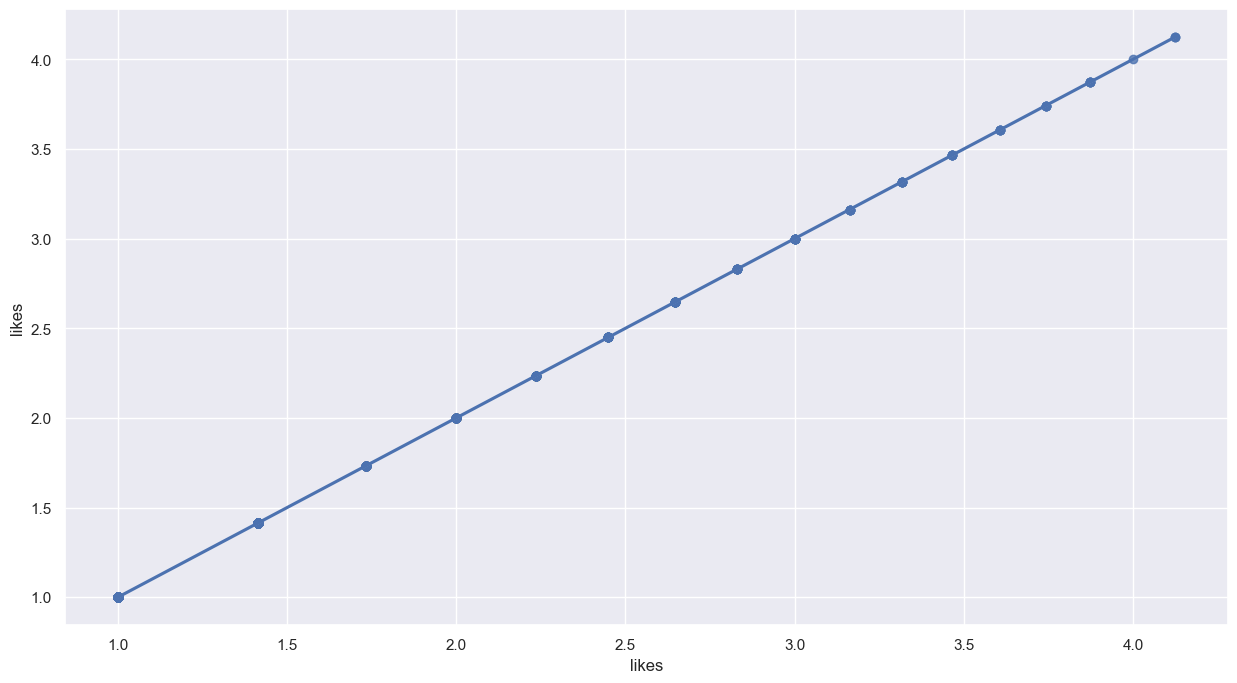

In [583]:
#1.
sns.regplot(x=y_train_rfe_IQR,y=y_train_rfe_IQR)
plt.show()

In [584]:
y_residual =  y_test_rfe  - y_pred_test_rfe

In [585]:
y_test_rfe.shape

(632,)

In [586]:
y_pred_train_rfe.shape

(1472,)

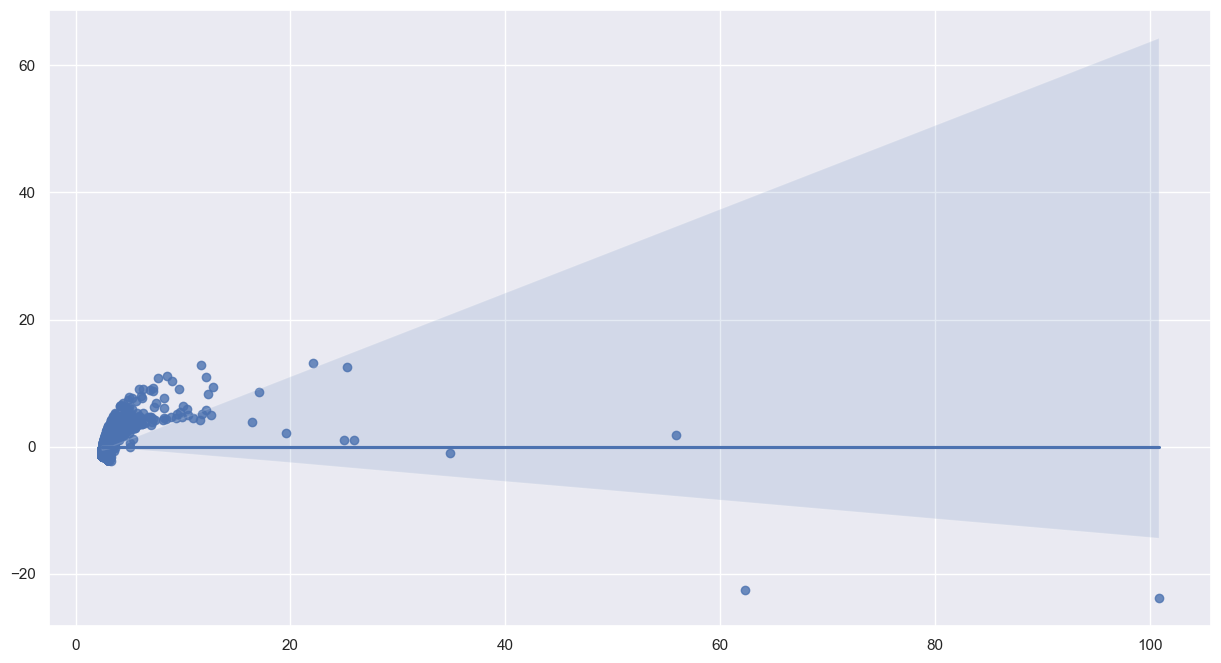

In [587]:
sns.regplot(y=model_rfe.resid,x=y_pred_train_rfe)
plt.show()

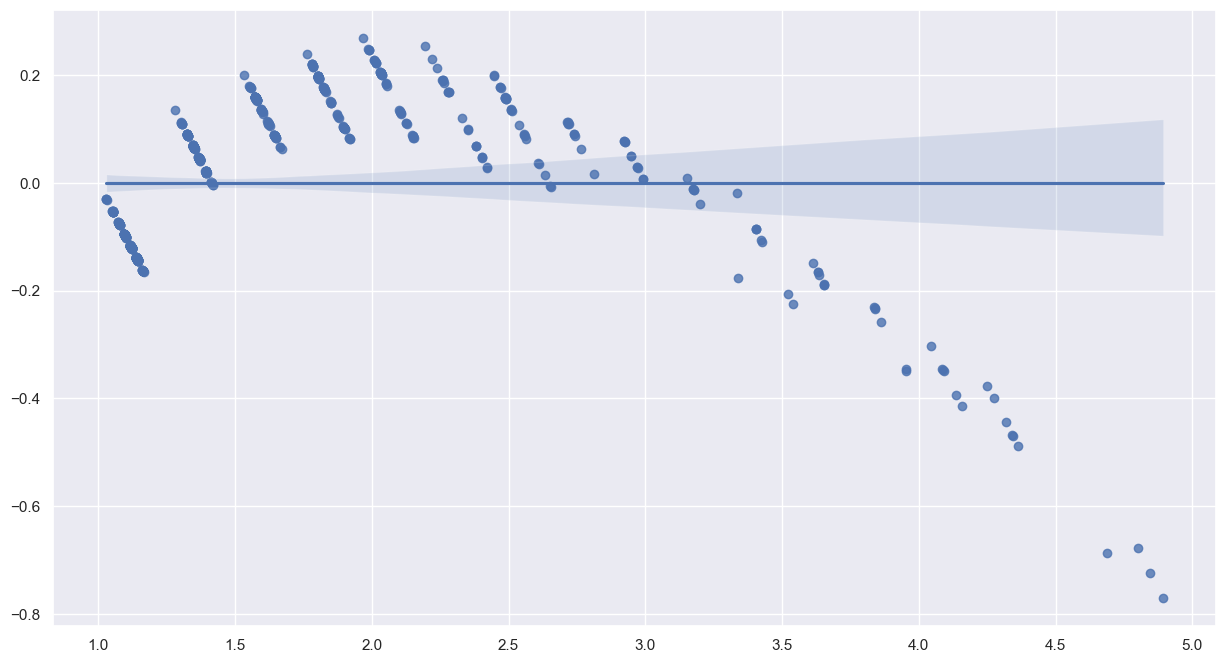

In [588]:
sns.regplot(y=model_rfe_IQR.resid,x=y_pred_train_rfe_IQR)
plt.show()

In [589]:
residuals_rfe = model_rfe.resid
resids_standardized = model_rfe.get_influence().resid_studentized_internal

rmse_resids_standardized = np.sqrt(np.abs(resids_standardized))


In [590]:
y_pred_train_rfe = model_rfe.predict(X_train_rfe)
y_pred_test_rfe = model_rfe.predict(X_test_rfe)

train_rmse = np.sqrt(mean_squared_error(y_train_rfe,y_pred_train_rfe))
test_rmse =  np.sqrt(mean_squared_error(y_test_rfe,y_pred_test_rfe))

print("train_rsme: ",train_rmse)
print("test_rsme: ",test_rmse)

train_rsme:  2.3484839731824976
test_rsme:  2.0905039463429675


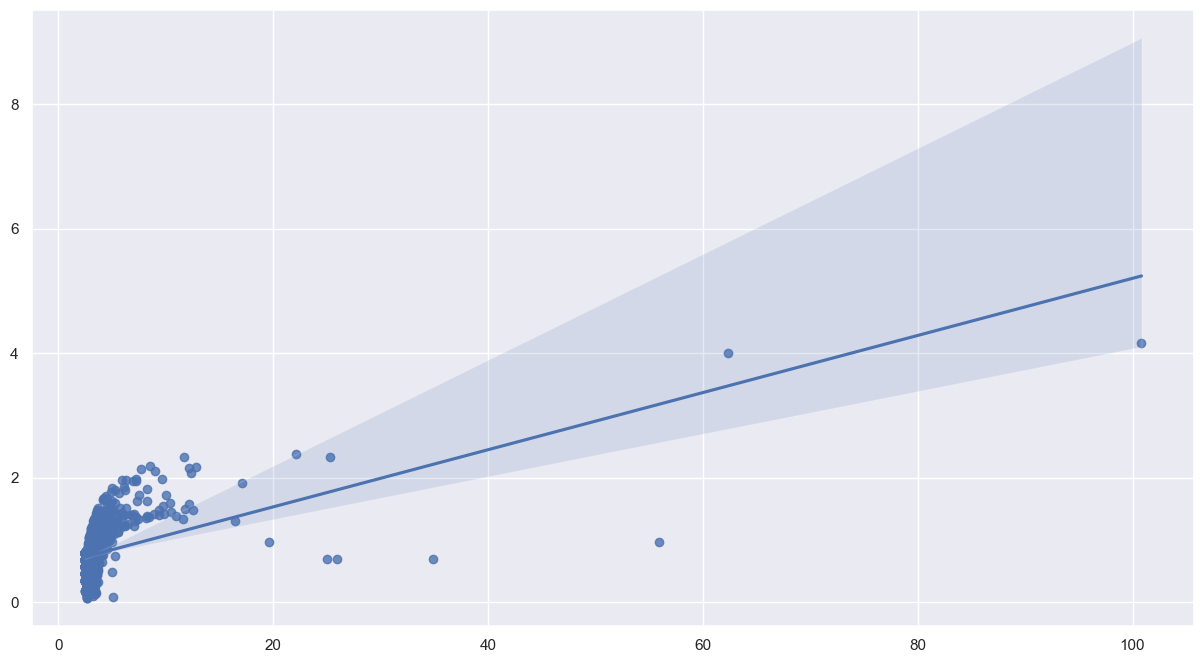

In [591]:
sns.regplot(x=y_pred_train_rfe,y=rmse_resids_standardized)
plt.show()

In [592]:
residuals_rfe = model_rfe_IQR.resid
resids_standardized = model_rfe_IQR.get_influence().resid_studentized_internal

rmse_resids_standardized = np.sqrt(np.abs(resids_standardized))


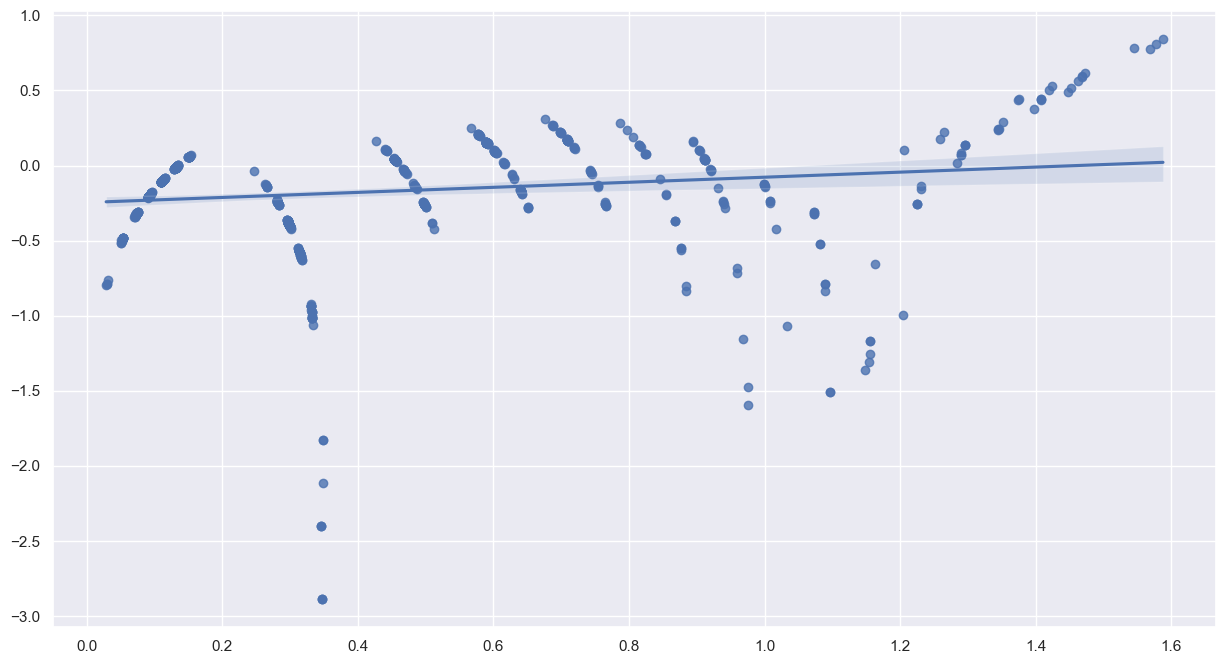

In [593]:

sns.regplot(x=np.log(y_pred_train_rfe_IQR),y=np.log(rmse_resids_standardized))
plt.show()

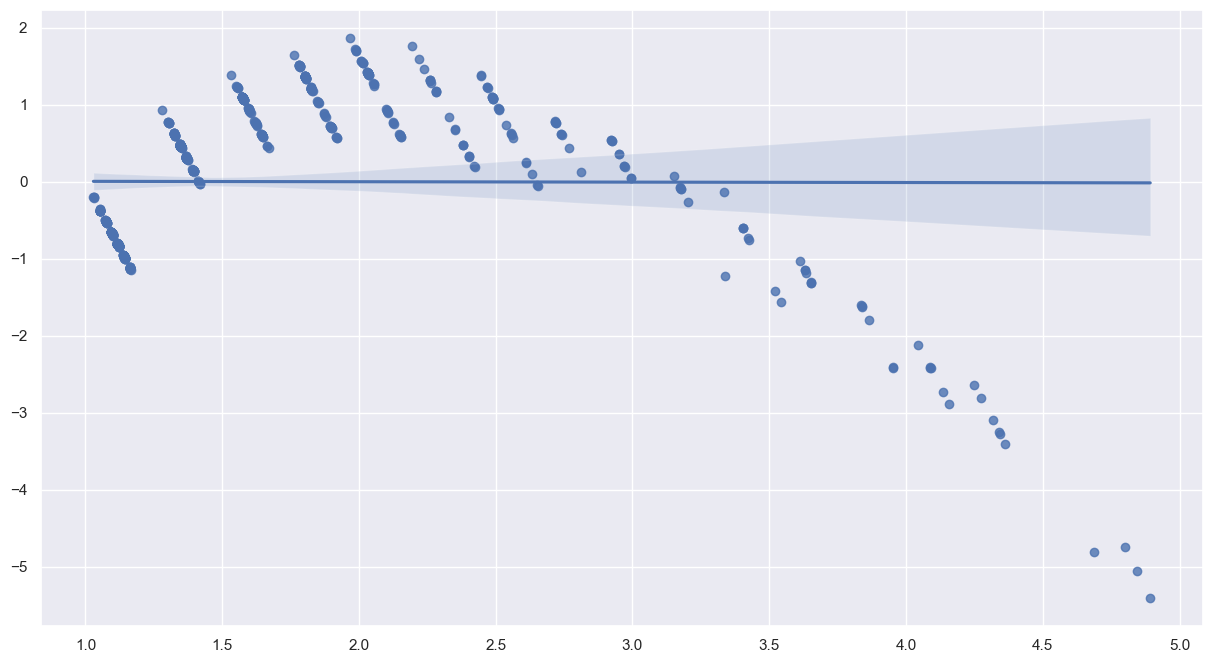

In [594]:
sns.regplot(y = resids_standardized,x=y_pred_train_rfe_IQR)
plt.show()

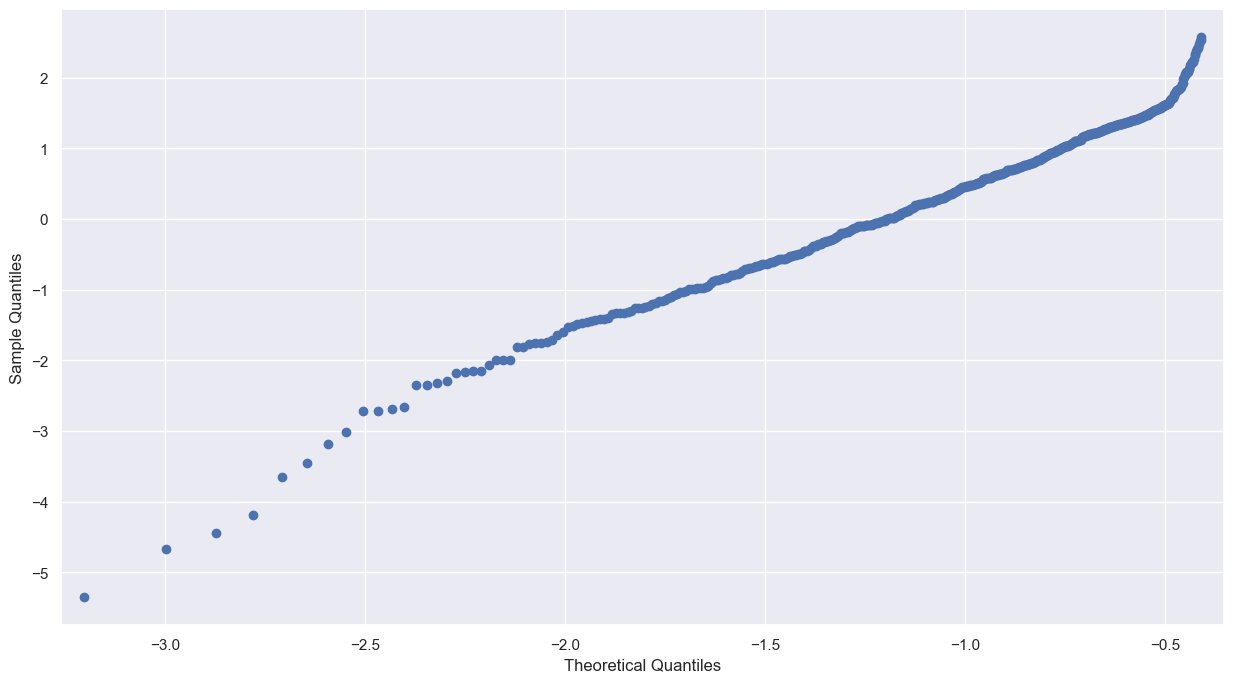

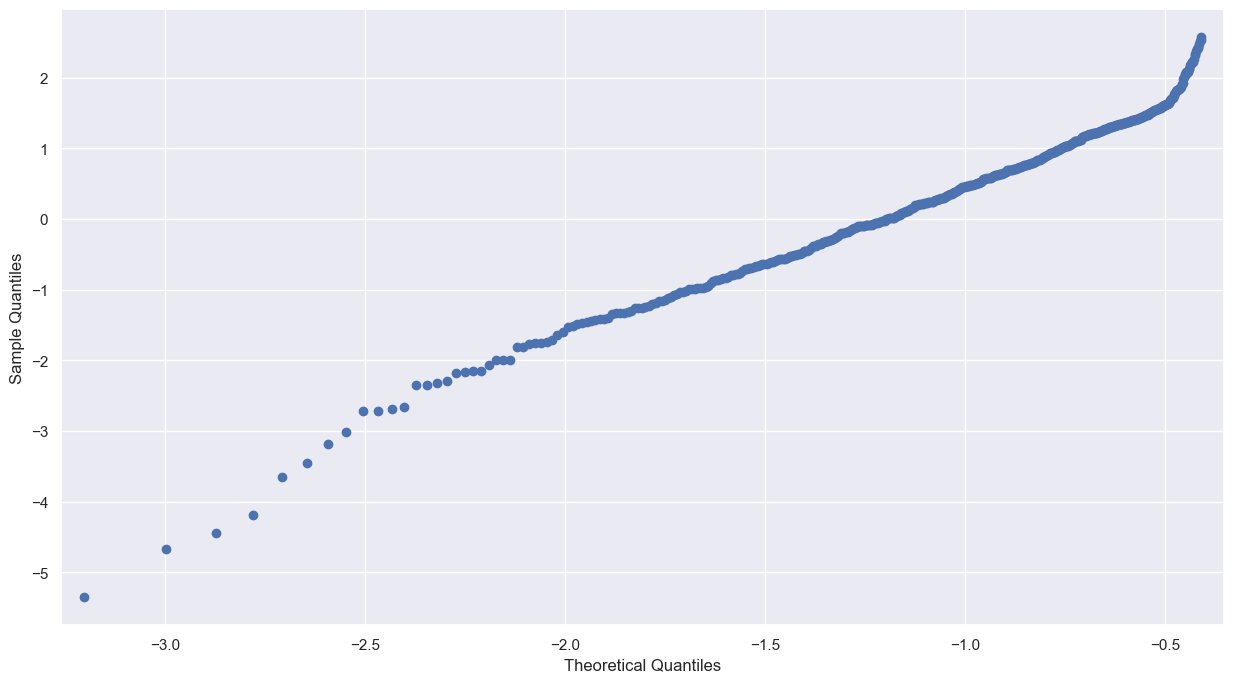

In [639]:
qqplot(np.log(model_vif.resid),line='r')

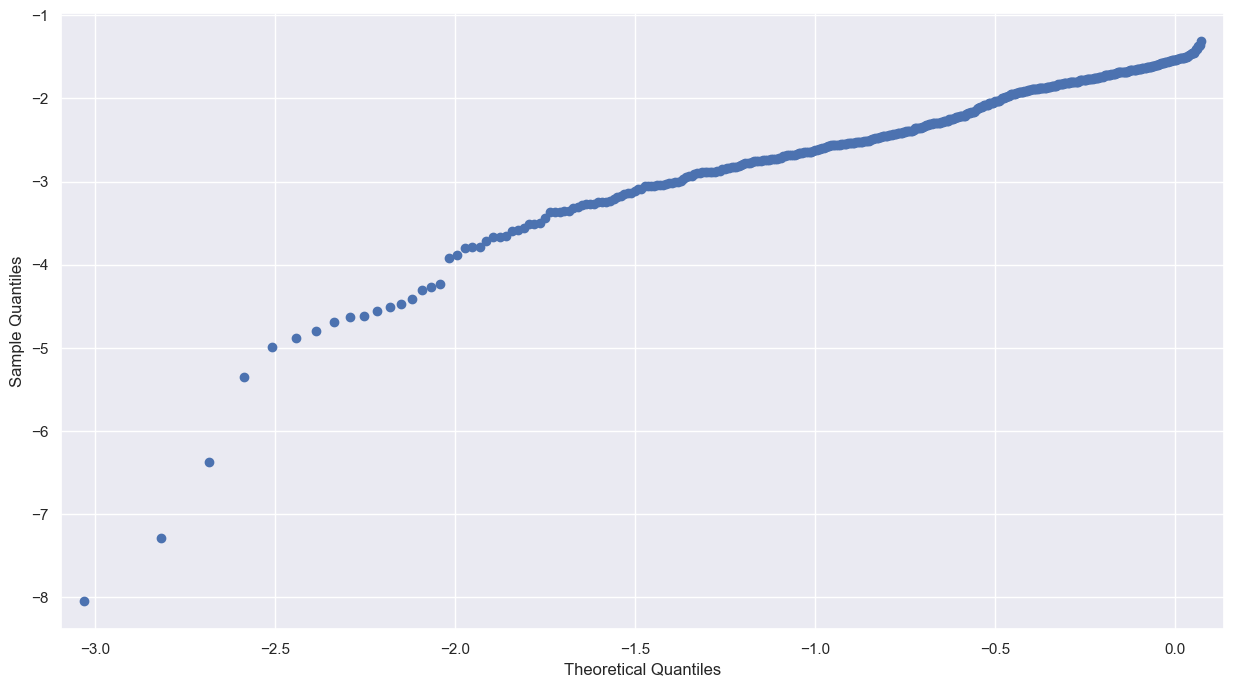

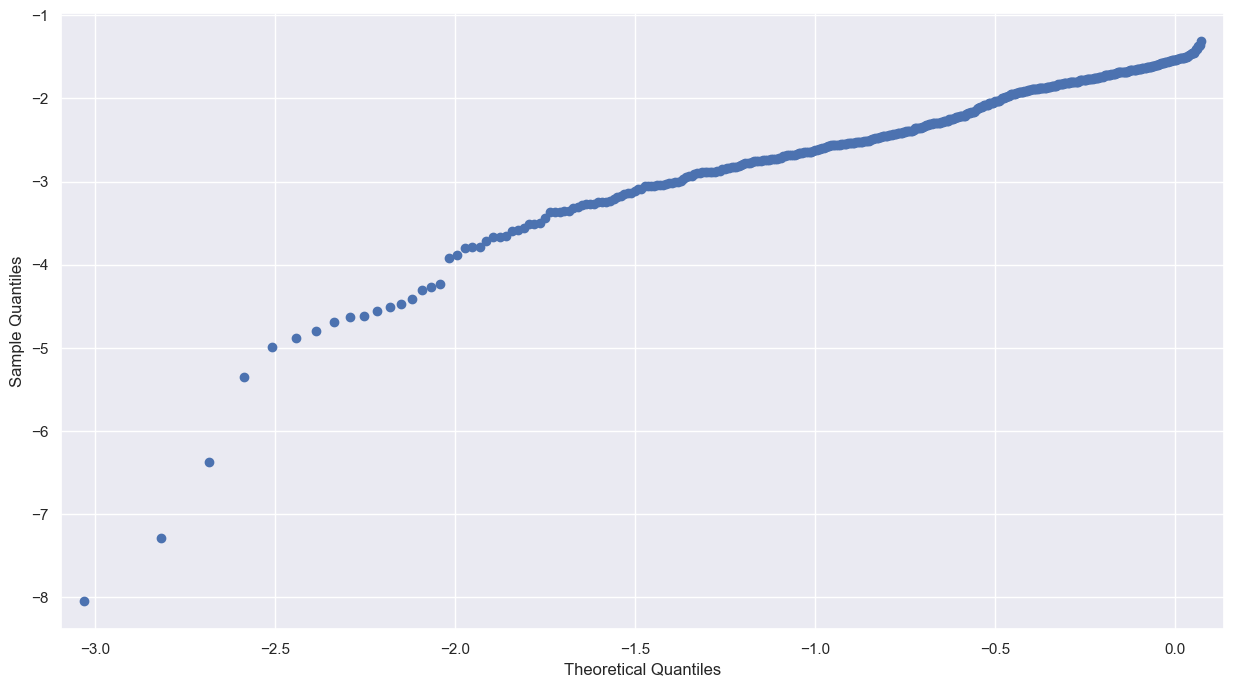

In [640]:
qqplot(np.log(model_IQR_vif.resid),line='r')

In [597]:
test = sms.het_breuschpagan(model_IQR_vif.resid,model_IQR_vif.model.exog)
test[2:]

(41.528202900185285, 3.446970376562111e-61)

In [598]:
#  There is not homoskedasticity for residual

In [599]:
stat,pvalue = stats.shapiro(model_IQR_vif.resid)

In [600]:
pvalue

3.631975586309884e-21

In [601]:
if pvalue > 0.05:
    print("Residual is normal")
else :
    print("Residual is not normal")

Residual is not normal


<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

In [602]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=lin_reg,k_features='best',forward=True,verbose=2,scoring='r2')
sfs_forward = linreg_forward.fit(X_train_vif,y_train_full)
#y_test_pred = lin_reg.predict(x_train_full)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-03-26 19:09:14] Features: 1/8 -- score: 0.30223729306426816[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-03-26 19:09:14] Features: 2/8 -- score: 0.3095795596240176[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-03-26 19:09:14] Features: 3/8 -- score: 0.30936376212811545[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [603]:
sfs_forward.k_feature_names_

('www_likes', 'gender_male')

In [604]:
sfs_forward.k_score_

0.3095795596240176

In [605]:
# back selection
linreg = LinearRegression()

linreg_backward = sfs(estimator=lin_reg,k_features='best',forward=False,verbose=2,scoring='r2')
sfs_backward = linreg_backward.fit(X_train_vif,y_train_full)
#y_test_pred = lin_reg.predict(x_train_full)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-03-26 19:09:15] Features: 7/1 -- score: 0.30745148019143814[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-03-26 19:09:15] Features: 6/1 -- score: 0.30825535769654594[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-03-26 19:09:15] Features: 5/1 -- score: 0.3087897116561233[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [606]:
sfs_backward.k_feature_names_

('www_likes', 'gender_male')

In [607]:
sfs_backward.k_score_

0.3095795596240176

In [608]:
# RFE selectiom
len1 = len(X_train_vif.columns)
lin_reg_rfe = LinearRegression()

rfe_model = RFE(estimator=lin_reg_rfe,n_features_to_select=13)

rfe_model = rfe_model.fit(X_train_vif,y_train_rfe)

feat_index = pd.Series(data=rfe_model.ranking_,index=X_train_vif.columns)

signi_feat_rfe =  feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['dob_day', 'dob_month', 'tenure', 'friend_count',
       'friendships_initiated', 'mobile_likes', 'www_likes', 'gender_male'],
      dtype='object')


In [609]:
df_likes['dob_month']

0        2
1        1
2       10
3        1
4        2
        ..
2099     3
2100     4
2101     4
2102     1
2103     8
Name: dob_month, Length: 2104, dtype: int64

In [610]:
X_RFE = X_full[signi_feat_rfe]
y_RFE = np.sqrt(df_likes['likes'])

In [611]:
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe =  train_test_split(X_RFE,y_RFE,test_size=0.3,random_state=1)
print("X_train_full",X_train_rfe.shape)
print("X_test_full",X_test_rfe.shape)
print("y_train_full",y_train_rfe.shape)
print("y_test_full",y_test_rfe.shape)

X_train_full (1472, 8)
X_test_full (632, 8)
y_train_full (1472,)
y_test_full (632,)


In [612]:
linreg_RFE = LinearRegression()
linreg_RFE.fit(X_train_rfe,y_train_rfe)
y_pred_rfe = linreg_RFE.predict(X_test_rfe)

In [613]:
linreg_RFE.score(X_train_rfe,y_train_rfe)

0.7228776435921588

In [614]:
y_test_rmse_RFE = np.sqrt(mean_squared_error(y_test_rfe,y_pred_rfe))
y_test_rmse_RFE

2.1231418397650397

In [615]:
kf = KFold(n_splits=5)

In [616]:
scores = cross_val_score(estimator=LinearRegression(),
                        X = X_train_rfe,
                        y = y_train_rfe,
                        cv = 10,
                        scoring = 'r2'
                        )

In [617]:
print("All Score",scores)

All Score [0.47967419 0.68940811 0.75815915 0.59878208 0.58219698 0.54975412
 0.22250728 0.85475906 0.5897413  0.609261  ]


In [618]:
print('Minimum score ',round(min(scores),4))
print('Maximum score ',round(max(scores),4))

Minimum score  0.2225
Maximum score  0.8548


In [619]:
# ridge regression

ridge = Ridge(alpha=0.2)
ridge.fit(X_train_rfe,y_train_rfe)
ridge.predict(X_train_rfe)

array([2.60196494, 3.19902172, 3.24855402, ..., 2.39169268, 2.85574247,
       3.05242483])

In [631]:
y_pred_test_rfe = ridge.predict(X_test_rfe)
ridge.score(X_test_rfe,y_test_rfe)

0.5423567804637675

In [621]:
# lasso regression
lasso = Lasso(alpha=0.3)
lasso.fit(X_train_rfe,y_train_rfe)
lasso.predict(X_train_rfe)

array([2.78195348, 2.85731336, 2.93968888, ..., 2.76234982, 3.08285583,
       2.74778136])

In [622]:
lasso.score(X_train_rfe,y_train_rfe)

0.7125154849997877

In [ ]:
lasso.score(X_test_rfe,y_)

In [632]:
y_pred_test_rfe = lasso.predict(X_test_rfe)
ridge.score(X_test_rfe,y_test_rfe)

0.5423567804637675

#### Feature selection using IQR Model

In [623]:
linreg = LinearRegression()

linreg_forward = sfs(estimator=lin_reg,k_features='best',forward=True,verbose=2,scoring='r2')
sfs_forward = linreg_forward.fit(X_train_rfe_IQR,y_train_rfe_IQR)
#y_test_pred = lin_reg.predict(x_train_full)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-03-26 19:09:15] Features: 1/6 -- score: 0.7138070748378375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2023-03-26 19:09:15] Features: 2/6 -- score: 0.9575607353250458[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-03-26 19:09:15] Features: 3/6 -- score: 0.9577627214806521[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [624]:
sfs_backward.k_feature_names_

('www_likes', 'gender_male')

In [625]:
sfs_backward.k_score_

0.3095795596240176

In [626]:
scores = cross_val_score(estimator=LinearRegression(),
                        X = X_train_rfe_IQR,
                        y = y_train_rfe_IQR,
                        cv = 5,
                        scoring = 'r2'
                        )

In [627]:
scores

array([0.95152543, 0.96572686, 0.95870424, 0.95726817, 0.95626575])

In [628]:
print('Minimum score ',round(min(scores),4))
print('Maximum score ',round(max(scores),4))

Minimum score  0.9515
Maximum score  0.9657


In [636]:
lr = LinearRegression()
lr.fit(X_train_rfe_IQR,y_train_rfe_IQR)
y_pred_IQR_train = lr.predict(X_train_rfe_IQR)
y_pred_IQR_test = lr.predict(X_test_rfe_IQR)
r2_score(y_test_rfe_IQR,y_pred_IQR_test)

0.962381523716627

In [637]:
train_rmse = mean_squared_error(y_true=y_train_rfe_IQR,y_pred=y_pred_IQR_train,squared=False)
test_rmse = mean_squared_error(y_true=y_test_rfe_IQR,y_pred=y_pred_IQR_test,squared=False)

In [638]:
print(train_rmse)
print(test_rmse)

0.14456549158250864
0.15129805671131544


In [629]:
# we can say that if we build model with outlier then accuracy of model is around 72%
# But if we if we build model without outlier then accuracy of model is around 95%